##### Names: Marcus Hom, Andrew Krasinski, Uros Nikolic <br>
CWID: ,10475994, 20017063 <br>
Assignment: Final Project - Presidential Election 2020 <br>
Purpose: Present the skills learned in course <br>
Pledge: I pledge my honor that I have abided by Stevens Honor System. 

In [3]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
frame = pa.read_csv("US_Election_dataset_v1.csv", na_values="?")
features = frame.drop(["2020_Democrat_vote_%", '2020_Republican_vote_%'], axis = 'columns' ) 
target_democrat = frame["2020_Democrat_vote_%"]
target_republican = frame["2020_Republican_vote_%"]
features = features.dropna()
target_democrat = target_democrat.dropna()
target_republican = target_republican.dropna()
frame

,Unnamed: 0,county,state,2020 Democrat vote raw,2020_Democrat_vote_%,2020 Republican vote raw,2020_Republican_vote_%,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,"Sweetwater County, Wyoming",Sweetwater County,Wyoming,3823,23.03,12229,73.66,551,3.32,2.40%,...,0.61,0.67,0.14,0.35,4.38,30.80,15.47,19.47,20.34,13.92
3139,"Teton County, Wyoming",Teton County,Wyoming,9848,67.10,4341,29.58,488,3.32,2.40%,...,0.28,1.32,0.01,0.42,3.24,46.14,23.75,17.91,5.81,6.40
3140,"Uinta County, Wyoming",Uinta County,Wyoming,1591,16.92,7496,79.73,315,3.35,2.10%,...,0.60,0.53,0.13,0.37,3.11,31.19,17.86,20.48,17.38,13.09
3141,"Washakie County, Wyoming",Washakie County,Wyoming,651,16.23,3245,80.88,116,2.89,1.40%,...,0.59,0.43,0.01,0.56,2.77,34.84,16.97,18.43,14.84,14.92


In [7]:
data = {
    "Column1": [1, 2, 3],
    "Column2": ["Autauga County, Alabama", 5, 6],
    "Column3": [7, 8, 9]
}

frame = pa.DataFrame(data)

# Identify non-numeric columns
for col in frame.columns:
    if frame[col].dtype == 'object':  # Check for strings
        print(f"Non-numeric values in column {col}:")
        print(frame[col])

# Option 1: Drop non-numeric columns
numeric_frame = frame.select_dtypes(include='number')

# Option 2: Replace non-numeric values with NaN or encode them
frame["Column2"] = pa.to_numeric(frame["Column2"], errors='coerce')  # Coerce invalid values to NaN

for i in features:
    newFeature = frame[i].value_counts()[0:2].index.to_list()
    frameTemp = frame[frame[i].isin(newFeature)]
    tab = pa.crosstab(frameTemp.Action, frameTemp[i])
    plt.figure(figsize = (12,5))
    # Plot the heatmap
    sns.heatmap(frame, annot=True, fmt='g', cmap='Greens')
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.show()



Non-numeric values in column Column2:
0    Autauga County, Alabama
1                          5
2                          6
Name: Column2, dtype: object


KeyError: 'Unnamed: 0'

<br><h4>Model K-Nearest Neighbor</h4><br>

In [5]:
non_numeric_columns = features.select_dtypes(include=['object']).columns

# Option 1: Encode categorical columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

target_democrat = pa.cut(target_democrat, bins=[0, 25, 50, 75, 100], labels=["low", "medium", "high", "very_high"])


In [6]:
non_numeric_columns = features.select_dtypes(include=['object']).columns

label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

target_republican = pa.cut(target_republican, bins=[0, 25, 50, 75, 100], labels=["low", "medium", "high", "very_high"])


In [7]:
featuresTrain, featuresTest, target_democratTrain, target_democratTest = train_test_split(
    features, target_democrat, test_size=0.3, random_state=5
)
_, _, target_republicanTrain, target_republicanTest = train_test_split(
    features, target_republican, test_size=0.3, random_state=5
)

In [8]:
knn_democrat = KNeighborsClassifier(n_neighbors=3)
knn_democrat.fit(featuresTrain, target_democratTrain)
target_democratPred = knn_democrat.predict(featuresTest)

In [9]:
# Republican target
knn_republican = KNeighborsClassifier(n_neighbors=3)
knn_republican.fit(featuresTrain, target_republicanTrain)
target_republicanPred = knn_republican.predict(featuresTest)

In [10]:
#Evaluate Democrat target
print("Democrat Target:")
print(f"Accuracy: {accuracy_score(target_democratTest, target_democratPred):.2f}\n")
print("Confusion Matrix:\n"+str(confusion_matrix(target_democratTest, target_democratPred))+"\n")
print("Classification Report:\n"+str(classification_report(target_democratTest, target_democratPred)+"\n"))

# Evaluate Republican target
print("\nRepublican Target:")
print(f"Accuracy: {accuracy_score(target_republicanTest, target_republicanPred):.2f}\n")
print("Confusion Matrix:\n"+str(confusion_matrix(target_republicanTest, target_republicanPred))+"\n")
print("Classification Report:\n"+str(classification_report(target_republicanTest, target_republicanPred)+"\n"))

Democrat Target:
Accuracy: 0.82

Confusion Matrix:
[[103   3  28   0]
 [  3 291  41   0]
 [ 14  69 376   0]
 [ 11   0   0   4]]

Classification Report:
              precision    recall  f1-score   support

        high       0.79      0.77      0.78       134
         low       0.80      0.87      0.83       335
      medium       0.84      0.82      0.83       459
   very_high       1.00      0.27      0.42        15

    accuracy                           0.82       943
   macro avg       0.86      0.68      0.72       943
weighted avg       0.82      0.82      0.82       943



Republican Target:
Accuracy: 0.82

Confusion Matrix:
[[416   0   6  73]
 [  0   5  12   0]
 [ 29   0 124   3]
 [ 43   0   0 232]]

Classification Report:
              precision    recall  f1-score   support

        high       0.85      0.84      0.85       495
         low       1.00      0.29      0.45        17
      medium       0.87      0.79      0.83       156
   very_high       0.75      0.84      0

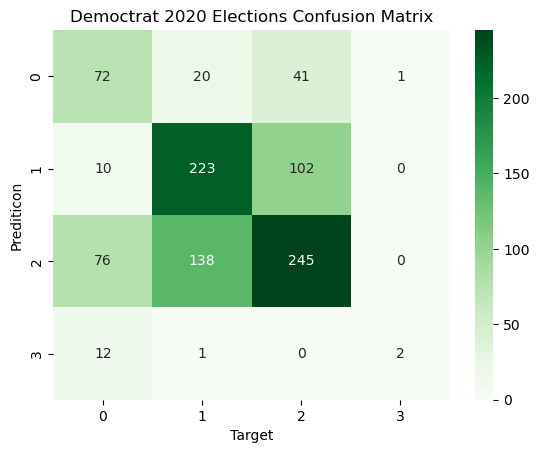

In [94]:
sns.heatmap(confusion_matrix(target_democratTest, target_democratPred), annot=True, fmt='g', cmap='Greens')
plt.xlabel('Target')
plt.ylabel('Prediticon')
plt.title('Democtrat 2020 Elections Confusion Matrix')
plt.show()


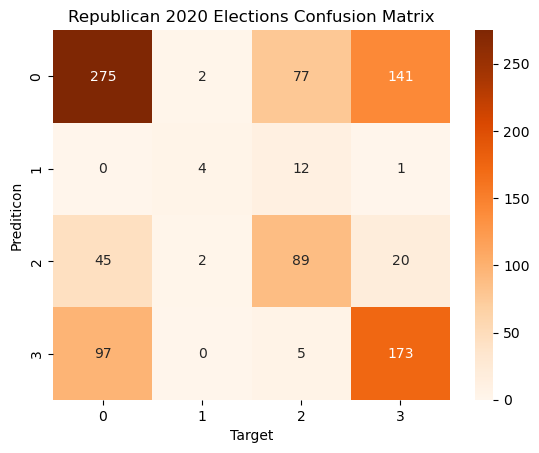

In [96]:
sns.heatmap(confusion_matrix(target_republicanTest, target_republicanPred), annot=True, fmt='g', cmap='Oranges')
plt.xlabel('Target')
plt.ylabel('Prediticon')
plt.title('Republican 2020 Elections Confusion Matrix')
plt.show()


<br><h4>Model Naive Bayes</h4><br>

In [13]:
# Define features and target variables
features = frame.drop(["2020_Democrat_vote_%", "2020_Republican_vote_%"], axis="columns")
target_democrat = frame["2020_Democrat_vote_%"]
target_republican = frame["2020_Republican_vote_%"]
# Convert target variables to numeric
target_democrat = pa.to_numeric(target_democrat, errors='coerce')
target_republican = pa.to_numeric(target_republican, errors='coerce')

valid_indices = target_democrat.notna() & target_republican.notna()
features = features[valid_indices]
target_democrat = target_democrat[valid_indices]
target_republican = target_republican[valid_indices]

In [14]:
non_numeric_columns = features.select_dtypes(include=['object']).columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

In [15]:
# Discretize and encode target variables
target_democrat = pa.cut(target_democrat, bins=[0, 25, 50, 75, 100], labels=["low", "medium", "high", "very_high"])
target_republican = pa.cut(target_republican, bins=[0, 25, 50, 75, 100], labels=["low", "medium", "high", "very_high"])


In [16]:

# Encode targets
le_democrat = LabelEncoder()
target_democrat = le_democrat.fit_transform(target_democrat)

le_republican = LabelEncoder()
target_republican = le_republican.fit_transform(target_republican)

In [17]:
# Train/test split
featuresTrain, featuresTest, target_democratTrain, target_democratTest = train_test_split(
    features, target_democrat, test_size=0.3, random_state=5
)
_, _, target_republicanTrain, target_republicanTest = train_test_split(
    features, target_republican, test_size=0.3, random_state=5
)

In [18]:
# Ensure test set is aligned with training set categories
for column in non_numeric_columns:
    le = label_encoders[column]
    featuresTest[column] = featuresTest[column].apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else np.random.choice(le.transform(le.classes_))
    )
    featuresTest[column] = featuresTest[column].replace(-1, 0)  # Replace unknown categories with 0 or valid placeholder

# Align test features with training features for categorical indices
for col in featuresTest.columns:
    max_train_index = featuresTrain[col].max()
    featuresTest[col] = featuresTest[col].apply(lambda x: x if x <= max_train_index else max_train_index)

In [19]:
# Train separate Naive Bayes models for each target
# Democrat target
cnb_democrat = CategoricalNB()
cnb_democrat.fit(featuresTrain, target_democratTrain)
target_democratPred = cnb_democrat.predict(featuresTest)

In [20]:
# Republican target
cnb_republican = CategoricalNB()
cnb_republican.fit(featuresTrain, target_republicanTrain)
target_republicanPred = cnb_republican.predict(featuresTest)

In [21]:
#Evaluate Democrat target
print("Democrat Target:")
print(f"Accuracy: {accuracy_score(target_democratTest, target_democratPred):.2f}\n")
print("Confusion Matrix:\n"+str(confusion_matrix(target_democratTest, target_democratPred))+"\n")
print("Classification Report:\n"+str(classification_report(target_democratTest, target_democratPred)+"\n"))

# Evaluate Republican target
print("\nRepublican Target:")
print(f"Accuracy: {accuracy_score(target_republicanTest, target_republicanPred):.2f}\n")
print("Confusion Matrix:\n"+str(confusion_matrix(target_republicanTest, target_republicanPred))+"\n")
print("Classification Report:\n"+str(classification_report(target_republicanTest, target_republicanPred)+"\n"))

Democrat Target:
Accuracy: 0.57

Confusion Matrix:
[[ 72  20  41   1]
 [ 10 223 102   0]
 [ 76 138 245   0]
 [ 12   1   0   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.54      0.47       134
           1       0.58      0.67      0.62       335
           2       0.63      0.53      0.58       459
           3       0.67      0.13      0.22        15

    accuracy                           0.57       943
   macro avg       0.58      0.47      0.47       943
weighted avg       0.59      0.57      0.57       943



Republican Target:
Accuracy: 0.57

Confusion Matrix:
[[275   2  77 141]
 [  0   4  12   1]
 [ 45   2  89  20]
 [ 97   0   5 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60       495
           1       0.50      0.24      0.32        17
           2       0.49      0.57      0.53       156
           3       0.52      0.63      0

<br><h4>Singualar value decomposition</h4><br>

In [23]:
# SVM for Democrat target
svm_democrat = SVC(kernel = 'linear', random_state = 42)
svm_democrat.fit(featuresTrain, target_democratTrain)
target_democratPred_svm = svm_democrat.predict(featuresTest)

In [24]:
# Evaluate SVM for Democrat target
print("SVM - Democrat Target:")
print(f"Accuracy: {accuracy_score(target_democratTest, target_democratPred_svm):.2f}\n")
print("Confusion Matrix:\n" + str(confusion_matrix(target_democratTest, target_democratPred_svm)) + "\n")
print("Classification Report:\n" + str(classification_report(target_democratTest, target_democratPred_svm)) + "\n")

SVM - Democrat Target:
Accuracy: 0.94

Confusion Matrix:
[[130   0   3   1]
 [  0 300  35   0]
 [  3  10 446   0]
 [  0   1   0  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       134
           1       0.96      0.90      0.93       335
           2       0.92      0.97      0.95       459
           3       0.93      0.93      0.93        15

    accuracy                           0.94       943
   macro avg       0.95      0.94      0.95       943
weighted avg       0.94      0.94      0.94       943




In [25]:
# SVM for Republican target
svm_republican = SVC(kernel = 'linear', random_state = 42)
svm_republican.fit(featuresTrain, target_republicanTrain)
target_republicanPred_svm = svm_republican.predict(featuresTest)

In [26]:
# Evaluate SVM for Republican target
print("\nSVM - Republican Target:")
print(f"Accuracy: {accuracy_score(target_republicanTest, target_republicanPred_svm):.2f}\n")
print("Confusion Matrix:\n" + str(confusion_matrix(target_republicanTest, target_republicanPred_svm)) + "\n")
print("Classification Report:\n" + str(classification_report(target_republicanTest, target_republicanPred_svm)) + "\n")


SVM - Republican Target:
Accuracy: 0.95

Confusion Matrix:
[[481   0   0  14]
 [  0  16   0   1]
 [  1   1 154   0]
 [ 30   0   0 245]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       495
           1       0.94      0.94      0.94        17
           2       1.00      0.99      0.99       156
           3       0.94      0.89      0.92       275

    accuracy                           0.95       943
   macro avg       0.96      0.95      0.95       943
weighted avg       0.95      0.95      0.95       943




<br><h4>Artificial Nerual Network</h4><br>

In [28]:
# ANN for Democrat target
ann_democrat = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 300, random_state = 42)
ann_democrat.fit(featuresTrain, target_democratTrain)
target_democratPred_ann = ann_democrat.predict(featuresTest)

In [29]:
# Evaluate ANN for Democrat target
print("\nANN - Democrat Target:")
print(f"Accuracy: {accuracy_score(target_democratTest, target_democratPred_ann):.2f}\n")
print("Confusion Matrix:\n" + str(confusion_matrix(target_democratTest, target_democratPred_ann)) + "\n")
print("Classification Report:\n" + str(classification_report(target_democratTest, target_democratPred_ann)) + "\n")


ANN - Democrat Target:
Accuracy: 0.77

Confusion Matrix:
[[114   0   9  11]
 [  0 274  61   0]
 [ 37  93 327   2]
 [  1   0   1  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       134
           1       0.75      0.82      0.78       335
           2       0.82      0.71      0.76       459
           3       0.50      0.87      0.63        15

    accuracy                           0.77       943
   macro avg       0.70      0.81      0.74       943
weighted avg       0.78      0.77      0.77       943




In [30]:
# ANN for Republican target
ann_republican = MLPClassifier(hidden_layer_sizes=(100,), max_iter = 300, random_state = 42)
ann_republican.fit(featuresTrain, target_republicanTrain)
target_republicanPred_ann = ann_republican.predict(featuresTest)

In [31]:
# Evaluate ANN for Republican target
print("\nANN - Republican Target:")
print(f"Accuracy: {accuracy_score(target_republicanTest, target_republicanPred_ann):.2f}\n")
print("Confusion Matrix:\n" + str(confusion_matrix(target_republicanTest, target_republicanPred_ann)) + "\n")
print("Classification Report:\n" + str(classification_report(target_republicanTest, target_republicanPred_ann)) + "\n")


ANN - Republican Target:
Accuracy: 0.83

Confusion Matrix:
[[407   1   8  79]
 [  0   9   7   1]
 [ 28   5 121   2]
 [ 29   2   3 241]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       495
           1       0.53      0.53      0.53        17
           2       0.87      0.78      0.82       156
           3       0.75      0.88      0.81       275

    accuracy                           0.83       943
   macro avg       0.76      0.75      0.75       943
weighted avg       0.83      0.83      0.83       943


